In [41]:
# Load stuff
import datetime as dt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
#import urllib
from subprocess import call
import glob
import os.path
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pickle

import urllib2
from urllib2 import Request, urlopen, URLError
# #import urllib
import os
from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
#!jupyter nbconvert --to script TexasWindProfile.ipynb

In [32]:
PLOT_FLAG = True
cwd = ''


In [18]:
# A function to download zip files
#Author: Bellerophon_
#Date Created: 04/12/15
#Usage: Used to scrape a website for links that end in .zip and list them
#Requirements: BeautifulSoup lib
#Notes: 

def DownloadZipFiles(_url,_dlurl):
    #Create a new directory to put the files into
    #Get the current working directory and create a new directory in it named test
    #cwd = os.getcwd()
    dirname = 'TexasWind'
    newdir = cwd + dirname
    print "The current Working directory is " + cwd
    newfile = open(newdir+'/zipfiles.txt','w')
    print newfile


    print "Downloading.. "
    #Set variable for page to be open and url to be concatenated 
    url = _url
    dlurl = _dlurl
    page = urllib2.urlopen(dlurl).read()

    #File extension to be looked for. 
    extension = ".zip"

    #Use BeautifulSoup to clean up the page
    soup = BeautifulSoup(page,"lxml")
    soup.prettify()

    #Find all the links on the page that end in .zip
    for anchor in soup.findAll('a', href=True):
        links = url + anchor['href']
        if True:#links.endswith(extension):
            newfile.write(links + '\n')
    newfile.close()

    #Read what is saved in zipfiles.txt and output it to the user
    #This is done to create presistent data 
    newfile = open(newdir+'/zipfiles.txt', 'r')
    #for line in newfile:
    #    print line
    newfile.close()

    #Read through the lines in the text file and download the zip files.
    #Handle exceptions and print exceptions to the console
    with open(newdir+'/zipfiles.txt', 'r') as url:
        for line in url:
            if line:
                try:
                    ziplink = line
                    #Removes the first 48 characters of the url to get the name of the file
                    #zipfile = line[48:]
                    #Removes the last 4 characters to remove the .zip
                    #zipfile2 = zipfile[:3]
                    #print "Trying to reach " + ziplink
                    response = urllib2.urlopen(ziplink)
                except URLError as e:
                    if hasattr(e, 'reason'):
                        print 'We failed to reach a server.'
                        print 'Reason: ', e.reason
                        continue
                    elif hasattr(e, 'code'):
                        print 'The server couldn\'t fulfill the request.'
                        print 'Error code: ', e.code
                        continue
                else:
                    zipcontent = response.read()
                    zipName = response.info()['Content-Disposition'] 
                    zipName=zipName[21:]
                    print zipName
                    completeName = os.path.join(newdir, zipName)
                    with open (completeName, 'w') as f:
                        print "downloading.. " + zipName
                        f.write(zipcontent)
                        f.close()
    print "Script completed"

# Wind data

In [19]:
# Download files
DownloadZipFiles('http://mis.ercot.com','http://mis.ercot.com/misapp/GetReports.do?reportTypeId=13028&reportTitle=Wind%20Power%20Production%20-%20Hourly%20Averaged%20Actual%20and%20Forecasted%20Values&showHTMLView=&mimicKey')


The current Working directory is 
<open file 'TexasWind/zipfiles.txt', mode 'w' at 0x7f539809d270>
Downloading.. 
cdr.00013028.0000000000000000.20190606.125619077.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190606.125619077.WPPHRLYAVGACTNP4732_csv.zip
cdr.00013028.0000000000000000.20190606.125619023.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190606.125619023.WPPHRLYAVGACTNP4732_xml.zip
cdr.00013028.0000000000000000.20190606.115619537.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190606.115619537.WPPHRLYAVGACTNP4732_csv.zip
cdr.00013028.0000000000000000.20190606.115619484.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190606.115619484.WPPHRLYAVGACTNP4732_xml.zip
cdr.00013028.0000000000000000.20190606.105618299.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190606.105618299.WPPHRLYAVGACTNP4732_csv.zip
cdr.00013028.0000000000000000.20190606.1056182

cdr.00013028.0000000000000000.20190605.125619560.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190605.125619560.WPPHRLYAVGACTNP4732_xml.zip
cdr.00013028.0000000000000000.20190605.115614709.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190605.115614709.WPPHRLYAVGACTNP4732_csv.zip
cdr.00013028.0000000000000000.20190605.115614642.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190605.115614642.WPPHRLYAVGACTNP4732_xml.zip
cdr.00013028.0000000000000000.20190605.105618727.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190605.105618727.WPPHRLYAVGACTNP4732_csv.zip
cdr.00013028.0000000000000000.20190605.105618665.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190605.105618665.WPPHRLYAVGACTNP4732_xml.zip
cdr.00013028.0000000000000000.20190605.095615538.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190605.095615538.WPPHRLYAVGACTNP4732_

cdr.00013028.0000000000000000.20190604.115613625.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190604.115613625.WPPHRLYAVGACTNP4732_csv.zip
cdr.00013028.0000000000000000.20190604.115613564.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190604.115613564.WPPHRLYAVGACTNP4732_xml.zip
cdr.00013028.0000000000000000.20190604.105618904.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190604.105618904.WPPHRLYAVGACTNP4732_csv.zip
cdr.00013028.0000000000000000.20190604.105618849.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190604.105618849.WPPHRLYAVGACTNP4732_xml.zip
cdr.00013028.0000000000000000.20190604.095616761.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190604.095616761.WPPHRLYAVGACTNP4732_csv.zip
cdr.00013028.0000000000000000.20190604.095616679.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190604.095616679.WPPHRLYAVGACTNP4732_

cdr.00013028.0000000000000000.20190603.115632372.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190603.115632372.WPPHRLYAVGACTNP4732_xml.zip
cdr.00013028.0000000000000000.20190603.105623201.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190603.105623201.WPPHRLYAVGACTNP4732_csv.zip
cdr.00013028.0000000000000000.20190603.105623144.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190603.105623144.WPPHRLYAVGACTNP4732_xml.zip
cdr.00013028.0000000000000000.20190603.095620204.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190603.095620204.WPPHRLYAVGACTNP4732_csv.zip
cdr.00013028.0000000000000000.20190603.095620005.WPPHRLYAVGACTNP4732_xml.zip
downloading.. cdr.00013028.0000000000000000.20190603.095620005.WPPHRLYAVGACTNP4732_xml.zip
cdr.00013028.0000000000000000.20190603.085620054.WPPHRLYAVGACTNP4732_csv.zip
downloading.. cdr.00013028.0000000000000000.20190603.085620054.WPPHRLYAVGACTNP4732_

In [20]:
# Data from http://mis.ercot.com/misapp/GetReports.do?reportTypeId=12311&reportTitle=Seven-Day%20Load%20Forecast%20by%20Forecast%20Zone&showHTMLView=&mimicKey
#  via http://www.ercot.com/gridinfo/generation

#Unzip all files that end in csv.zip
zipfilenamepattern = cwd+'TexasWind/*WPP*_csv.zip'
zipfilenames = glob.glob(zipfilenamepattern)
unzip_folder = cwd+'TexasWind/'
for zipfilename in zipfilenames:
    if not os.path.exists(zipfilename[:-8]+'.csv'): 
        call(['unzip','-n',zipfilename,'-d',unzip_folder])

csvfilenamepattern = cwd+'TexasWind/cdr.*WPP*.csv'
csvfilenamepattern = glob.glob(csvfilenamepattern)
print csvfilenamepattern[0], len(csvfilenamepattern)

TexasWind/cdr.00013028.0000000000000000.20190604.185616.WPPHRLYAVGACTNP4732.csv 85


In [21]:
#Read all CSVs in a Pandas notebook

HourlyWinds=pd.DataFrame()

for csvname in csvfilenamepattern:
    HourlyWind=pd.read_csv(csvname)
    HourlyWinds=HourlyWinds.append(HourlyWind,ignore_index=True)

In [22]:
#Create an index for time 
HourlyWinds = HourlyWinds.dropna(axis=0,how='any',subset=['ACTUAL_SYSTEM_WIDE'])
HourlyWinds.HOUR_ENDING=HourlyWinds.HOUR_ENDING-1

SortedHourlyWinds=HourlyWinds.groupby(['DELIVERY_DATE','HOUR_ENDING']).mean()

AvgHourlyWinds=HourlyWinds.groupby(['HOUR_ENDING']).mean()
if PLOT_FLAG:
    plt.figure()
    plt.plot(SortedHourlyWinds['ACTUAL_SYSTEM_WIDE'].values)

    plt.figure()

    AvgHourlyWinds['ACTUAL_SYSTEM_WIDE'].plot()
    plt.figure()
    for myday in HourlyWinds['DELIVERY_DATE'].unique():
        daywinds=SortedHourlyWinds.loc[myday]
        plt.plot(daywinds['ACTUAL_SYSTEM_WIDE'].values)

In [23]:

HourlyWinds['ts']=HourlyWinds.DELIVERY_DATE+' '+HourlyWinds.HOUR_ENDING.map(str)+':00'
HourlyWinds['ts']

HourlyWinds['ts']=pd.to_datetime(HourlyWinds['ts'])
HourlyWinds.set_index(['ts'],inplace=True)
#pd.to_datetime(HourlyWinds['DELIVERY_DATE'],HourlyWinds['HOUR_ENDING'])

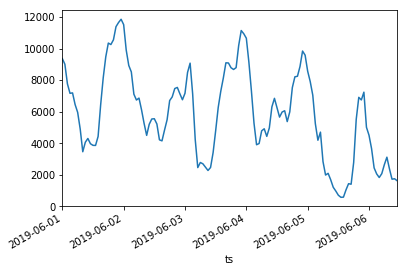

In [43]:
if PLOT_FLAG:
    HourlyWinds['ACTUAL_SYSTEM_WIDE'].plot()

In [26]:
np.save(cwd+'TexasAvgWindProfile.npy',AvgHourlyWinds['ACTUAL_SYSTEM_WIDE'])

In [27]:
AvgHourlyWinds['ACTUAL_SYSTEM_WIDE']

HOUR_ENDING
0     8910.527647
1     8458.412882
2     7725.999412
3     6196.599941
4     4597.079059
5     4177.590412
6     4225.318118
7     3959.949647
8     3555.379529
9     3481.741235
10    4029.453000
11    4499.400059
12    4723.444882
13    4895.485941
14    5110.124353
15    5610.666118
16    6107.570588
17    6595.448118
18    7485.434765
19    7980.493059
20    8349.739588
21    9014.856529
22    9487.512529
23    9150.110947
Name: ACTUAL_SYSTEM_WIDE, dtype: float64

# Solar data

In [28]:
#Download solar data
DownloadZipFiles('http://mis.ercot.com','http://mis.ercot.com/misapp/GetReports.do?reportTypeId=13483&reportTitle=Solar%20Power%20Production%20-%20Hourly%20Averaged%20Actual%20and%20Forecasted%20Values&showHTMLView=&mimicKey')

The current Working directory is 
<open file 'TexasWind/zipfiles.txt', mode 'w' at 0x7f53980d6030>
Downloading.. 
cdr.00013483.0000000000000000.20190606.133114491.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190606.133114491.PVGRHRLYAVGACTNP4737_csv.zip
cdr.00013483.0000000000000000.20190606.133114401.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190606.133114401.PVGRHRLYAVGACTNP4737_xml.zip
cdr.00013483.0000000000000000.20190606.123122282.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190606.123122282.PVGRHRLYAVGACTNP4737_csv.zip
cdr.00013483.0000000000000000.20190606.123122231.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190606.123122231.PVGRHRLYAVGACTNP4737_xml.zip
cdr.00013483.0000000000000000.20190606.113112737.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190606.113112737.PVGRHRLYAVGACTNP4737_csv.zip
cdr.00013483.0000000000000000.201906

cdr.00013483.0000000000000000.20190605.133118102.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190605.133118102.PVGRHRLYAVGACTNP4737_csv.zip
cdr.00013483.0000000000000000.20190605.133118053.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190605.133118053.PVGRHRLYAVGACTNP4737_xml.zip
cdr.00013483.0000000000000000.20190605.123120284.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190605.123120284.PVGRHRLYAVGACTNP4737_csv.zip
cdr.00013483.0000000000000000.20190605.123120210.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190605.123120210.PVGRHRLYAVGACTNP4737_xml.zip
cdr.00013483.0000000000000000.20190605.113112190.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190605.113112190.PVGRHRLYAVGACTNP4737_csv.zip
cdr.00013483.0000000000000000.20190605.113112124.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190605.113112124.PVGRHRLYA

cdr.00013483.0000000000000000.20190604.133118027.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190604.133118027.PVGRHRLYAVGACTNP4737_xml.zip
cdr.00013483.0000000000000000.20190604.123115853.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190604.123115853.PVGRHRLYAVGACTNP4737_csv.zip
cdr.00013483.0000000000000000.20190604.123115780.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190604.123115780.PVGRHRLYAVGACTNP4737_xml.zip
cdr.00013483.0000000000000000.20190604.113108969.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190604.113108969.PVGRHRLYAVGACTNP4737_csv.zip
cdr.00013483.0000000000000000.20190604.113108900.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190604.113108900.PVGRHRLYAVGACTNP4737_xml.zip
cdr.00013483.0000000000000000.20190604.103115748.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190604.103115748.PVGRHRLYA

cdr.00013483.0000000000000000.20190603.123116387.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190603.123116387.PVGRHRLYAVGACTNP4737_xml.zip
cdr.00013483.0000000000000000.20190603.113112711.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190603.113112711.PVGRHRLYAVGACTNP4737_csv.zip
cdr.00013483.0000000000000000.20190603.113112644.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190603.113112644.PVGRHRLYAVGACTNP4737_xml.zip
cdr.00013483.0000000000000000.20190603.103111578.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190603.103111578.PVGRHRLYAVGACTNP4737_csv.zip
cdr.00013483.0000000000000000.20190603.103111524.PVGRHRLYAVGACTNP4737_xml.zip
downloading.. cdr.00013483.0000000000000000.20190603.103111524.PVGRHRLYAVGACTNP4737_xml.zip
cdr.00013483.0000000000000000.20190603.093110335.PVGRHRLYAVGACTNP4737_csv.zip
downloading.. cdr.00013483.0000000000000000.20190603.093110335.PVGRHRLYA

In [29]:

#Extract
zipfilenamepattern = cwd+'TexasWind/cdr.*.PVG*_csv.zip'
zipfilenames = glob.glob(zipfilenamepattern)
for zipfilename in zipfilenames:
    if not os.path.exists(zipfilename[:-8]+'.csv'): 
        call(['unzip','-n',zipfilename,'-d',unzip_folder])

csvfilenamepattern = cwd+'TexasWind/cdr.*PVG*.csv'
csvfilenamepattern = glob.glob(csvfilenamepattern)
print csvfilenamepattern[0], len(csvfilenamepattern)

TexasWind/cdr.00013483.0000000000000000.20190605.013110.PVGRHRLYAVGACTNP4737.csv 86


In [30]:
#Read all CSVs in a Pandas notebook

HourlySun=pd.DataFrame()
for csvname in csvfilenamepattern:
    #print csvname
    HourlySunT=pd.read_csv(csvname)
    HourlySun=HourlySun.append(HourlySunT,ignore_index=True)


In [33]:
#Create an index for time 
HourlySun = HourlySun.dropna(axis=0,how='any',subset=['ACTUAL_SYSTEM_WIDE'])
HourlySun.HOUR_ENDING=HourlySun.HOUR_ENDING-1

SortedHourlySun=HourlySun.groupby(['DELIVERY_DATE','HOUR_ENDING']).mean()
AvgHourlySun=HourlySun.groupby(['HOUR_ENDING']).mean()

if PLOT_FLAG:
    plt.figure()
    plt.plot(SortedHourlySun['ACTUAL_SYSTEM_WIDE'].values)

    plt.figure()
    AvgHourlySun['ACTUAL_SYSTEM_WIDE'].plot()
    plt.figure()
    for myday in HourlySun['DELIVERY_DATE'].unique():
        daysun=SortedHourlySun.loc[myday]
        plt.plot(daysun['ACTUAL_SYSTEM_WIDE'].values)

In [34]:

HourlySun['ts']=HourlySun.DELIVERY_DATE+' '+HourlySun.HOUR_ENDING.map(str)+':00'
HourlySun['ts']

HourlySun['ts']=pd.to_datetime(HourlySun['ts'])
HourlySun.set_index(['ts'],inplace=True)

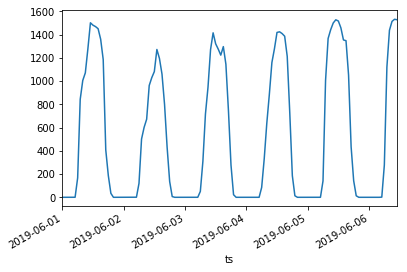

In [42]:
if PLOT_FLAG:
    HourlySun['ACTUAL_SYSTEM_WIDE'].plot()

In [40]:
HourlySun

,DELIVERY_DATE,HOUR_ENDING,ACTUAL_SYSTEM_WIDE,COP_HSL_SYSTEM_WIDE,STPPF_SYSTEM_WIDE,PVGRPP_SYSTEM_WIDE,DSTFlag
ts,,,,,,,
2019-06-03 00:00:00,06/03/2019,0,0.00,0.0,0.0,0.0,N
2019-06-03 01:00:00,06/03/2019,1,0.00,0.0,0.0,0.0,N
2019-06-03 02:00:00,06/03/2019,2,0.00,0.0,0.0,0.0,N
2019-06-03 03:00:00,06/03/2019,3,0.00,0.0,0.0,0.0,N
2019-06-03 04:00:00,06/03/2019,4,0.00,0.0,0.0,0.0,N
2019-06-03 05:00:00,06/03/2019,5,0.25,0.1,0.4,0.3,N
2019-06-03 06:00:00,06/03/2019,6,50.56,98.8,97.3,71.6,N
2019-06-03 07:00:00,06/03/2019,7,308.81,439.0,271.3,186.8,N
2019-06-03 08:00:00,06/03/2019,8,716.36,683.1,594.5,432.0,N


In [36]:
np.save(cwd+'TexasAvgSunProfile.npy',AvgHourlySun['ACTUAL_SYSTEM_WIDE'])

## Load Data by weather region

In [37]:
DownloadZipFiles('http://mis.ercot.com','http://mis.ercot.com/misapp/GetReports.do?reportTypeId=13101&reportTitle=Actual%20System%20Load%20by%20Weather%20Zone&showHTMLView=&mimicKey')

The current Working directory is 
<open file 'TexasWind/zipfiles.txt', mode 'w' at 0x7f53980d6030>
Downloading.. 
cdr.00013101.0000000000000000.20190606.055000755.ACTUALSYSLOADWZNP6345_csv.zip
downloading.. cdr.00013101.0000000000000000.20190606.055000755.ACTUALSYSLOADWZNP6345_csv.zip
cdr.00013101.0000000000000000.20190606.055000691.ACTUALSYSLOADWZNP6345_xml.zip
downloading.. cdr.00013101.0000000000000000.20190606.055000691.ACTUALSYSLOADWZNP6345_xml.zip
cdr.00013101.0000000000000000.20190605.055001030.ACTUALSYSLOADWZNP6345_csv.zip
downloading.. cdr.00013101.0000000000000000.20190605.055001030.ACTUALSYSLOADWZNP6345_csv.zip
cdr.00013101.0000000000000000.20190605.055000939.ACTUALSYSLOADWZNP6345_xml.zip
downloading.. cdr.00013101.0000000000000000.20190605.055000939.ACTUALSYSLOADWZNP6345_xml.zip
cdr.00013101.0000000000000000.20190604.055000849.ACTUALSYSLOADWZNP6345_csv.zip
downloading.. cdr.00013101.0000000000000000.20190604.055000849.ACTUALSYSLOADWZNP6345_csv.zip
cdr.00013101.0000000000000

cdr.00013101.0000000000000000.20190514.055000811.ACTUALSYSLOADWZNP6345_xml.zip
downloading.. cdr.00013101.0000000000000000.20190514.055000811.ACTUALSYSLOADWZNP6345_xml.zip
cdr.00013101.0000000000000000.20190513.055000717.ACTUALSYSLOADWZNP6345_csv.zip
downloading.. cdr.00013101.0000000000000000.20190513.055000717.ACTUALSYSLOADWZNP6345_csv.zip
cdr.00013101.0000000000000000.20190513.055000585.ACTUALSYSLOADWZNP6345_xml.zip
downloading.. cdr.00013101.0000000000000000.20190513.055000585.ACTUALSYSLOADWZNP6345_xml.zip
cdr.00013101.0000000000000000.20190512.055000731.ACTUALSYSLOADWZNP6345_csv.zip
downloading.. cdr.00013101.0000000000000000.20190512.055000731.ACTUALSYSLOADWZNP6345_csv.zip
cdr.00013101.0000000000000000.20190512.055000663.ACTUALSYSLOADWZNP6345_xml.zip
downloading.. cdr.00013101.0000000000000000.20190512.055000663.ACTUALSYSLOADWZNP6345_xml.zip
cdr.00013101.0000000000000000.20190511.055001059.ACTUALSYSLOADWZNP6345_csv.zip
downloading.. cdr.00013101.0000000000000000.20190511.05500105

In [44]:
# Data from http://mis.ercot.com/misapp/GetReports.do?reportTypeId=12311&reportTitle=Seven-Day%20Load%20Forecast%20by%20Forecast%20Zone&showHTMLView=&mimicKey
#  via http://www.ercot.com/gridinfo/generation

#Unzip all files that end in csv.zip
zipfilenamepattern = cwd+'TexasWind/*ACTUALSYSLOAD*_csv.zip'
zipfilenames = glob.glob(zipfilenamepattern)
unzip_folder = cwd+'TexasWind/'
for zipfilename in zipfilenames:
    if not os.path.exists(zipfilename[:-8]+'.csv'): 
        call(['unzip','-n',zipfilename,'-d',unzip_folder])

In [45]:
csvfilenamepattern = cwd+'TexasWind/cdr.*ACTUALSYSLOAD*.csv'
csvfilenamepattern = glob.glob(csvfilenamepattern)
print csvfilenamepattern[0], len(csvfilenamepattern)

TexasWind/cdr.00013101.0000000000000000.20190515.055000.ACTUALSYSLOADWZNP6345.csv 32


In [46]:
#Read all CSVs in a Pandas notebook

HourlyLoad=pd.DataFrame()
for csvname in csvfilenamepattern:
    #print csvname
    HourlyLoadT=pd.read_csv(csvname)
    HourlyLoad=HourlyLoad.append(HourlyLoadT,ignore_index=True)


In [47]:
#Create an index for time 
HourlyLoad = HourlyLoad.dropna(axis=0,how='any',subset=['TOTAL'])
HourlyLoad['HourEndingStr']=HourlyLoad['HourEnding']
def HourStrToNum(_hstr):
    return int(_hstr[:2])
HourlyLoad.HourEnding=HourlyLoad.HourEndingStr.apply(HourStrToNum)

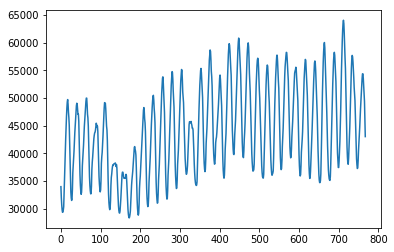

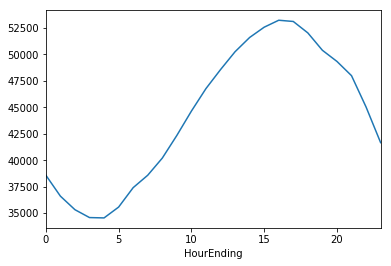

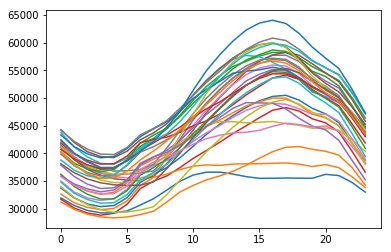

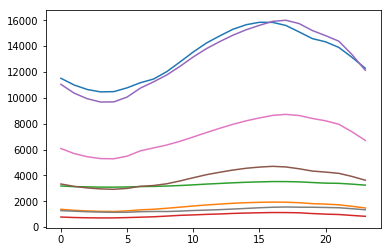

In [48]:
regions = ['COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST']

HourlyLoad.HourEnding=HourlyLoad.HourEnding-1

SortedHourlyLoad=HourlyLoad.groupby(['OperDay','HourEnding']).mean()
AvgHourlyLoad=HourlyLoad.groupby(['HourEnding']).mean()

if PLOT_FLAG:
    plt.figure()
    plt.plot(SortedHourlyLoad['TOTAL'].values)

    plt.figure()
    AvgHourlyLoad['TOTAL'].plot()
    plt.figure()
    for myday in HourlyLoad['OperDay'].unique():
        dayload=SortedHourlyLoad.loc[myday]
        plt.plot(dayload['TOTAL'].values)
    plt.figure()
    for myregion in regions:
        plt.plot(AvgHourlyLoad[myregion].values)

In [49]:

HourlyLoad['ts']=HourlyLoad.OperDay+' '+HourlyLoad.HourEnding.map(str)+':00'
HourlyLoad['ts']

HourlyLoad['ts']=pd.to_datetime(HourlyLoad['ts'])
HourlyLoad.set_index(['ts'],inplace=True)

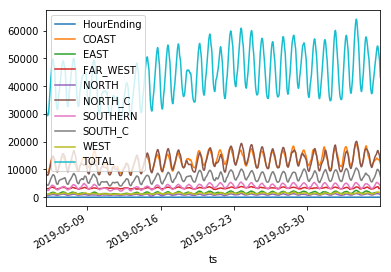

In [50]:
if PLOT_FLAG:
    HourlyLoad.plot()

In [53]:
#Pickle road graph
output = open(cwd+'LoadsByRegion.pkl', 'wb')
pickle.dump(AvgHourlyLoad, output)
output.close()



# Extract just coast data for Puerto Rico

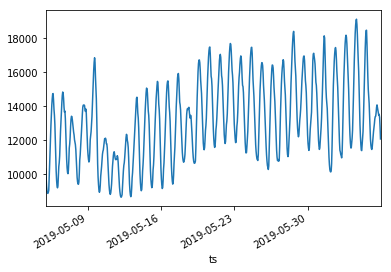

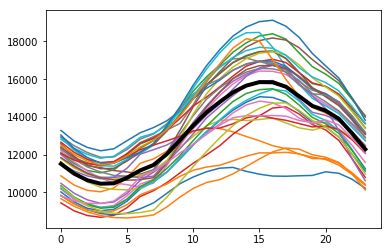

In [52]:
if PLOT_FLAG:
    plt.figure()
    HourlyLoad['COAST'].plot()
    plt.figure()
    for myday in HourlyLoad['OperDay'].unique():
        dayload=SortedHourlyLoad.loc[myday]
        plt.plot(dayload['COAST'].values)
    plt.plot(AvgHourlyLoad['COAST'].values,linewidth=4,color='k')

np.save(cwd+'TexasCoastAvgDayLoad.npy',AvgHourlyLoad['COAST'].values)
    